In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
#%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

#Missing values
import missingno as mno

from sklearn import linear_model

In [2]:
#----------Find what the charecter encoding-----
import chardet

file="C:/Hymaa/Data Science/Project 1/Data.csv"
with open(file,'rb') as rawdata:
    result=chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
#Charecter encoding done in ascii

df = pd.read_csv(file,encoding='ISO8859-1',low_memory=False,sep=',')
df.columns=df.columns.str.rstrip() #Remove white spaces in column names
df.columns=df.columns.str.lstrip()
print(df.head())

#Data Types
display(df.info())

# Statistics for each column
display(df.describe())

   member_id  loan_amnt      terms    batch_ID  Rate_of_intrst grade  \
0   58189336      14350  36 months                       19.19     E   
1   70011223       4800  36 months  BAT1586599           10.99     B   
2   70255675      10000  36 months  BAT1586599            7.26     A   
3    1893936      15000  36 months  BAT4808022           19.72     D   
4    7652106      16000  36 months  BAT2833642           10.64     B   

  sub_grade                    Emp_designation Experience home_ownership  \
0        E3                              clerk    9 years            OWN   
1        B4         Human Resources Specialist   < 1 year       MORTGAGE   
2        A4                             Driver    2 years            OWN   
3        D5  Us office of Personnel Management  10+ years           RENT   
4        B2        LAUSD-HOLLYWOOD HIGH SCHOOL  10+ years           RENT   

   annual_inc verification_status             purpose State  \
0     28700.0     Source Verified  debt_consoli

None

,member_id,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,8.873790e+05,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05
mean,3.500182e+07,14755.264605,13.246740,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,25.268026,1754.804327,0.396692,45.919243,4.880757,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05
std,2.411335e+07,8435.455601,4.381867,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,11.840561,2095.356099,4.087825,409.693874,63.125281,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05
min,7.047300e+04,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.087713e+07,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,17.000000,441.460000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04
50%,3.709528e+07,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,24.000000,1073.280000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04
75%,5.847135e+07,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.082900e+04,32.000000,2238.265000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05
max,7.354484e+07,35000.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,86.000000,2.904836e+06,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06


In [5]:
# --------------------Rename the reveloving balance ------------------------------------------
df = df.rename(columns = {'total revol_bal': 'total_revol_bal'})

# Statistics for each column
desc_temp=df.describe()
display(desc_temp)

,member_id,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total_revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,8.873790e+05,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887350.000000,8.171030e+05,8.171030e+05
mean,3.500182e+07,14755.264605,13.246740,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,25.268026,1754.804327,0.396692,45.919243,4.880757,0.014380,44.104838,0.004991,2.257026e+02,1.394582e+05
std,2.411335e+07,8435.455601,4.381867,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,11.840561,2095.356099,4.087825,409.693874,63.125281,0.134191,22.179841,0.077625,1.031137e+04,1.537500e+05
min,7.047300e+04,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.087713e+07,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,17.000000,441.460000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000e+00,2.985300e+04
50%,3.709528e+07,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,24.000000,1073.280000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000e+00,8.055900e+04
75%,5.847135e+07,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.082900e+04,32.000000,2238.265000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000e+00,2.082050e+05
max,7.354484e+07,35000.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,90.000000,86.000000,2.904836e+06,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.000000,188.000000,14.000000,9.152545e+06,8.000078e+06


In [6]:
#---------Data Munging--------------------------
# Missing Values
# Rename columns
# Data Transformation
# Coding,en-coding,decoding
# Outlier
# Anamolies

display(df.isnull().head())

#Missing Values
display(df.isnull().sum())

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df)

,member_id,loan_amnt,terms,batch_ID,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total_revol_bal,total_credits,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False


member_id                           0
loan_amnt                           0
terms                               0
batch_ID                       130748
Rate_of_intrst                      0
grade                               0
sub_grade                           0
Emp_designation                 51462
Experience                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
purpose                             0
State                               0
debt_income_ratio                   0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
numb_credit                        29
pub_rec                            29
total_revol_bal                     0
total_credits                      29
initial_list_status                 0
total_rec_int                       0
total_rec_late_fee                  0
recoveries  

Your selected dataframe has 36 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
verification_status_joint,886868,99.9
mths_since_last_record,750326,84.6
mths_since_last_major_derog,665676,75.0
mths_since_last_delinq,454312,51.2
batch_ID,130748,14.7
tot_colle_amt,70276,7.9
tot_curr_bal,70276,7.9
Emp_designation,51462,5.8
Experience,44825,5.1
collections_12_mths_ex_med,145,0.0


In [7]:
#---------------- Get the columns with > 50% missing-------------
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 36 columns.
There are 17 columns that have missing values.
We will remove 4 columns.


In [8]:
# ---------Drop the columns----------------
df = df.drop(columns = list(missing_columns))

# For older versions of pandas (https://github.com/pandas-dev/pandas/issues/19078)
# data = data.drop(list(missing_columns), axis = 1)

df=df.drop(columns = 'member_id')
df=df.drop(columns = 'batch_ID')
display(df.columns)

print(len(df))
final_missing_columns=missing_values_table(df)
display(final_missing_columns.index)

Index(['loan_amnt', 'terms', 'Rate_of_intrst', 'grade', 'sub_grade',
       'Emp_designation', 'Experience', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'State', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total_revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_colle_amt',
       'tot_curr_bal'],
      dtype='object')

887379
Your selected dataframe has 30 columns.
There are 12 columns that have missing values.


Index(['tot_colle_amt', 'tot_curr_bal', 'Emp_designation', 'Experience',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'inq_last_6mths',
       'numb_credit', 'pub_rec', 'total_credits', 'acc_now_delinq',
       'annual_inc'],
      dtype='object')

In [9]:
# --------------------Create List for each type ------------------------------------------
def Creat_List_For_Each_Type(df,num_cols):
    int_vars=[]
    categorical_vars=[]
    continuous_vars=[]

    for i in df.columns:
        if num_cols.columns.__contains__(i):
           if num_cols[i]['25%']+num_cols[i]['50%']+num_cols[i]['75%'] == 0 :
               int_vars.append(i)
           else:
               continuous_vars.append(i)
        else:
            categorical_vars.append(i)
    return int_vars,categorical_vars,continuous_vars
      
int_vars,categorical_vars,continuous_vars=Creat_List_For_Each_Type(df,desc_temp)
print("Categorical Variables: "+','.join(categorical_vars)+"\n\nInteger Variables: "+','.join(int_vars)+"\n\nContinuous Variables: "+','.join(continuous_vars))


Categorical Variables: terms,grade,sub_grade,Emp_designation,Experience,home_ownership,verification_status,purpose,State,initial_list_status,application_type,last_week_pay

Integer Variables: delinq_2yrs,pub_rec,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt

Continuous Variables: loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,inq_last_6mths,numb_credit,total_revol_bal,total_credits,total_rec_int,tot_curr_bal


In [11]:
#Dropping 29 records which is having blank data for most of the features
df=df[df['numb_credit'].isnull() == False]
final_missing_columns=missing_values_table(df)
print(final_missing_columns.index)

display(missing_values_table(df))
df_updated=df.copy()

Your selected dataframe has 30 columns.
There are 5 columns that have missing values.
Index(['tot_colle_amt', 'tot_curr_bal', 'Emp_designation', 'Experience',
       'collections_12_mths_ex_med'],
      dtype='object')
Your selected dataframe has 30 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
tot_colle_amt,70247,7.9
tot_curr_bal,70247,7.9
Emp_designation,51450,5.8
Experience,44825,5.1
collections_12_mths_ex_med,116,0.0


In [12]:
#Imputing Categorical Variables
temp=df.Experience.value_counts()
temp=pd.DataFrame(temp)
temp['Percentage']=round((temp/len(df['Experience']))*100,2)
display(temp)

,Experience,Percentage
10+ years,291566,32.86
2 years,78869,8.89
< 1 year,70587,7.95
3 years,70024,7.89
1 year,57092,6.43
5 years,55704,6.28
4 years,52529,5.92
7 years,44594,5.03
8 years,43955,4.95
6 years,42949,4.84


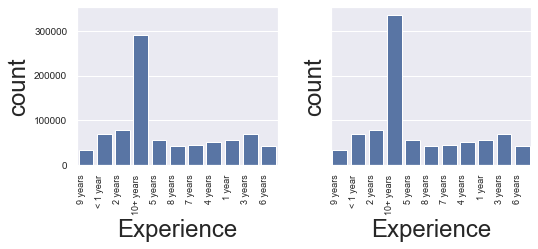

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=2,sharex=True, sharey=True)
fig.set_size_inches(8,4)

ax=sns.countplot(df.Experience,color='b',ax=axes[0])
ax.tick_params(labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=9)

#Missing Values Imputation
df_updated['Experience'].fillna(value=df['Experience'].value_counts().index[0], inplace=True)
ax1=sns.countplot(df_updated.Experience,color='b',ax=axes[1])
#ax1.set_xticklabels([0,50])
#ax1.set_yticklabels([])
ax1.tick_params(labelsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=9)
plt.tight_layout()

In [14]:
temp=df.Emp_designation.value_counts()[:20]
temp=pd.DataFrame(temp)
temp['Percentage']=round((temp/len(df['Emp_designation']))*100,2)
display(temp)

df_updated['Emp_designation'].fillna(value=df['Emp_designation'].value_counts().index[0], inplace=True)

,Emp_designation,Percentage
Teacher,13807,1.56
Manager,11638,1.31
Registered Nurse,5691,0.64
Owner,5512,0.62
RN,5491,0.62
Supervisor,5414,0.61
Sales,4457,0.50
Project Manager,4087,0.46
Driver,3722,0.42
Office Manager,3615,0.41


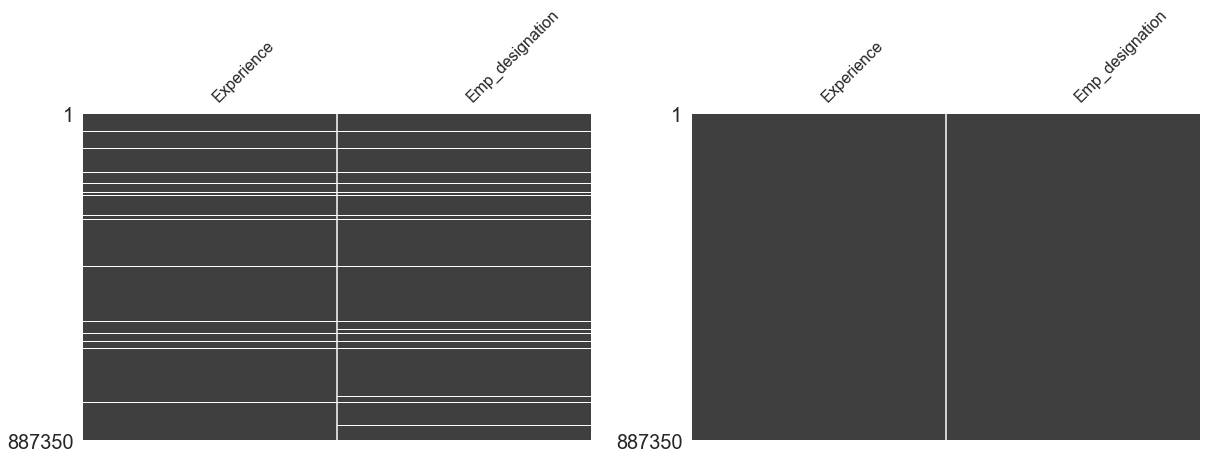

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 6)
temp=['Experience','Emp_designation']
mno.matrix(df[temp],ax=axes[0])
mno.matrix(df_updated[temp], ax=axes[1])

In [16]:
#encode the Categorical Variables
label_encoder = LabelEncoder()

for i in categorical_vars:
    print(type(i))
    print(i)
    df_updated[i] = label_encoder.fit_transform(df_updated[i]).astype('float64')

df_updated=df_updated.drop(columns = 'collections_12_mths_ex_med')
df_updated.isnull().sum()

<class 'str'>
terms
<class 'str'>
grade
<class 'str'>
sub_grade
<class 'str'>
Emp_designation
<class 'str'>
Experience
<class 'str'>
home_ownership
<class 'str'>
verification_status
<class 'str'>
purpose
<class 'str'>
State
<class 'str'>
initial_list_status
<class 'str'>
application_type
<class 'str'>
last_week_pay


loan_amnt                      0
terms                          0
Rate_of_intrst                 0
grade                          0
sub_grade                      0
Emp_designation                0
Experience                     0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
State                          0
debt_income_ratio              0
delinq_2yrs                    0
inq_last_6mths                 0
numb_credit                    0
pub_rec                        0
total_revol_bal                0
total_credits                  0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
application_type               0
last_week_pay                  0
acc_now_delinq                 0
tot_colle_amt              70247
tot_curr_bal               70247
dtype: int64

In [17]:
df['tot_colle_amt'].describe() # Removing the feature
base=len(df)
zeros=df[df['tot_colle_amt'] == 0]['tot_colle_amt'].count()
valid=df[df['tot_colle_amt'] > 0]['tot_colle_amt'].count()
missing=df['tot_colle_amt'].isnull().sum()

print(str(zeros)+" - "+str(round((zeros/base)*100)),0)
print(str(valid)+" - "+str(round((valid/base)*100)),0)
print(str(missing)+" - "+str(round((missing/base)*100)),0)

700946 - 79.0 0
116157 - 13.0 0
70247 - 8.0 0


In [18]:
drop_cols=['tot_curr_bal','annual_inc','debt_income_ratio','numb_credit','loan_amnt','total_credits','home_ownership','Emp_designation','total_rec_int','verification_status','initial_list_status','Rate_of_intrst','delinq_2yrs','Experience','purpose','pub_rec','total_revol_bal']
len(drop_cols)

df_updated=df_updated[drop_cols]
len(df_updated.columns)

len(df_updated)
desc_temp=df.describe()
int_vars,categorical_vars,continuous_vars=Creat_List_For_Each_Type(df_updated,desc_temp)
print("Categorical Variables: "+','.join(categorical_vars)+"\n\nInteger Variables: "+','.join(int_vars)+"\n\nContinuous Variables: "+','.join(continuous_vars))

Categorical Variables: home_ownership,Emp_designation,verification_status,initial_list_status,Experience,purpose

Integer Variables: delinq_2yrs,pub_rec

Continuous Variables: tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst,total_revol_bal


In [19]:
#Imputation Numeric variables - Linear Regression Imputation Technique

#The function random_imputation replaces the missing values with some random observed values of the variable. The method is repeated for all the variables containing missing values, after which they serve as parameters in the regression model to estimate other variable values.

#Simple Random Imputation is one of the crude methods since it ignores all the other available data and thus it's very rarely used. But it serves as a good starting point for regression imputation.

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df


temp=['tot_curr_bal']
for feature in temp:
    df_updated[feature + '_imp'] = df_updated[feature]
    df_updated = random_imputation(df_updated, feature)


In [20]:
deter_data = pd.DataFrame(columns = ["Mis" + name for name in temp])

for feature in temp:
        
    deter_data["Mis" + feature] = df_updated[feature + "_imp"]
    parameters = list(set(df_updated.columns) - set(temp) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df_updated[parameters], y = df_updated[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df_updated[feature].isnull(), "Mis" + feature] = model.predict(df_updated[parameters])[df_updated[feature].isnull()]

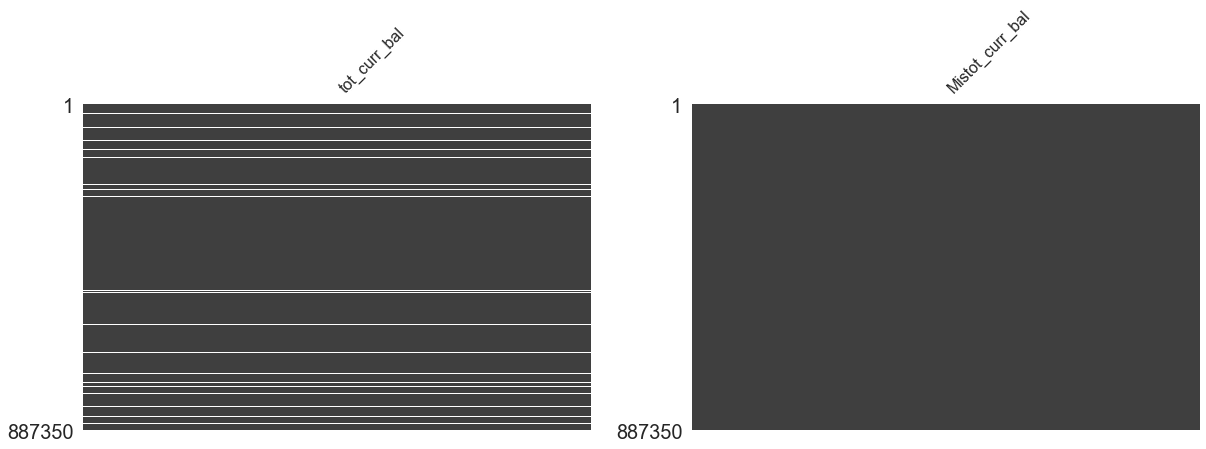

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 6)

mno.matrix(df[temp],ax=axes[0])
mno.matrix(deter_data, ax=axes[1])

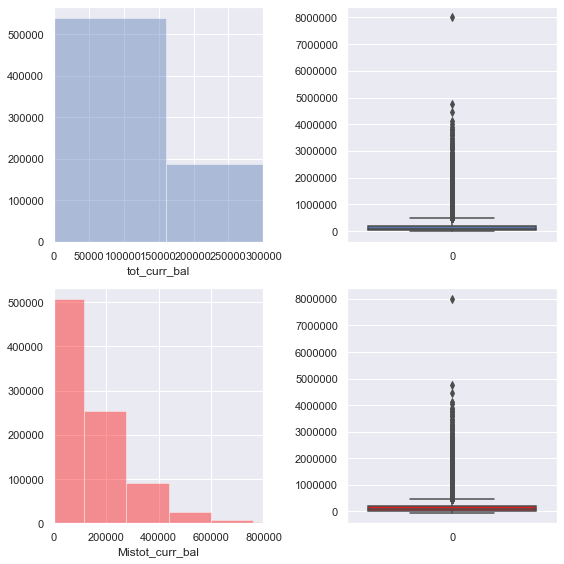

In [22]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(temp):
    ax1=sns.distplot(df_updated[variable].dropna(), kde = False, ax = axes[index, 0])
    ax2=sns.distplot(deter_data["Mis" + variable], kde = False, ax = axes[1, 0], color = 'red')
    ax1.set(xlim=(0,300000))
    ax2.set(xlim=(0,800000))
    sns.boxplot(data = df_updated[variable], ax = axes[0, 1])
    sns.boxplot(data = deter_data["Mis" + variable],ax = axes[1, 1], color = 'red')
    
plt.tight_layout()


In [23]:
temp1=['Mistot_curr_bal']
pd.concat([df[temp], deter_data[temp1]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
tot_curr_bal,817103.0,139458.189336,153749.966885,0.000000,29853.00,80559.000000,208205.0,8000078.0
Mistot_curr_bal,887350.0,138137.537932,149906.373300,-44287.786902,30739.25,82881.861048,204682.0,8000078.0


In [24]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in temp])

for feature in temp:
        
    random_data["Ran" + feature] = df_updated[feature + '_imp']
    parameters = list(set(df_updated.columns) - set(temp) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = df_updated[parameters], y = df_updated[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(df_updated[parameters])
    std_error = (predict[df_updated[feature].notnull()] - df_updated.loc[df_updated[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size =df_updated[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(df_updated[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df_updated[feature].isnull()) & 
                                                                            (random_predict > 0)]

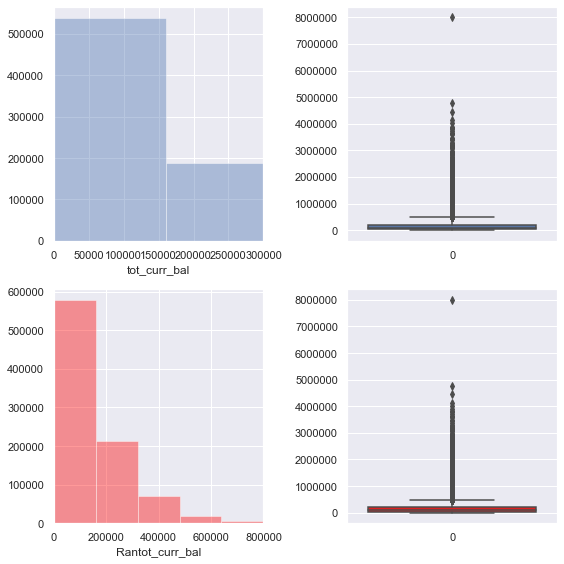

In [23]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(temp):
    ax1=sns.distplot(df_updated[variable].dropna(), kde = False, ax = axes[index, 0])
    ax2=sns.distplot(random_data["Ran" + variable], kde = False, ax = axes[1, 0], color = 'red')
    ax1.set(xlim=(0,300000))
    ax2.set(xlim=(0,800000))
    sns.boxplot(data = df_updated[variable], ax = axes[0, 1])
    sns.boxplot(data = random_data["Ran" + variable],ax = axes[1, 1], color = 'red')
    
plt.tight_layout()


In [25]:
temp1=['Rantot_curr_bal']
pd.concat([df[temp], random_data[temp1]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
tot_curr_bal,817103.0,139458.189336,153749.966885,0.0,29853.0,80559.0,208205.00,8000078.0
Rantot_curr_bal,887350.0,141411.650900,151726.208236,0.0,31065.0,87201.0,211143.75,8000078.0


In [27]:
#random_data.to_csv("C:\Hymaa\Data Science\Project 1\Random_data.csv",index=True,header=False)
#deter_data.to_csv("C:\Hymaa\Data Science\Project 1\Deter_data.csv",index=True,header=False)
df_updated.to_csv("C:\Hymaa\Data Science\Project 1\DF_updated.csv",index=True,header=False)

In [29]:
df_updated['tot_curr_bal']=random_data['Rantot_curr_bal'].copy()
df_updated['tot_curr_bal'].isnull().sum()
df_updated['tot_curr_bal'].describe()

count    8.873500e+05
mean     1.414117e+05
std      1.517262e+05
min      0.000000e+00
25%      3.106500e+04
50%      8.720100e+04
75%      2.111438e+05
max      8.000078e+06
Name: tot_curr_bal, dtype: float64

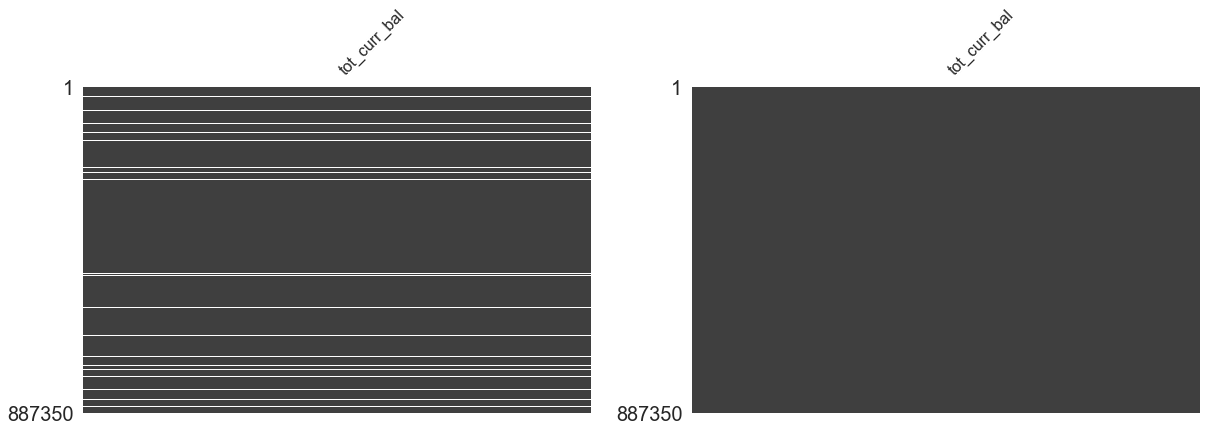

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 6)

mno.matrix(df[temp],ax=axes[0])
mno.matrix(df_updated[temp], ax=axes[1])

In [229]:

def RemoveOutliers(df,var_name):
    # Calculate first and third quartile
    first_quartile = df[var_name].describe()['25%']
    third_quartile = df[var_name].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile
    print(iqr)
    # Remove outliers
    df=df[(df[var_name] >= (first_quartile - (1.15*iqr))) &
                (df[var_name] <= (third_quartile + (1.15*iqr)))]
    return df
    
def ImputeOutliers(df_t,var_name):
    q1 = df_t[var_name].quantile(0.25) #first quartile value
    q3 = df_t[var_name].quantile(0.75) # third quartile value
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr #acceptable range
    
    display(var_name)
    df_t[var_name]=df_t.query(str(var_name)+' >= @low')[var_name]
    df_t[var_name].fillna(value=low, inplace=True)
    display("Low - "+str(low))
    
    df_t[var_name]=df_t.query(str(var_name)+' <= @high')[var_name]
    df_t[var_name].fillna(value=high, inplace=True)
    display("High - "+str(high))
    
    #display(var_name)
    #df_t[var_name]=df_t.query(str(var_name)+' >= @low and '+str(var_name)+' <= @high')[var_name]
    #df_t[var_name].fillna(value=df_t[var_name].median(), inplace=True)
    #display("Median - "+str(df_t[var_name].median()))
    
    #display(var_name)
    
    #df_t[var_name]=df_t.query(str(var_name)+' >= @low and '+str(var_name)+' <= @high')[var_name]
    #print("Len - "+str(len(df_t)))
    #print("Len NUll - "+str(df_t[var_name].isnull().sum()))
    #display("Mean - "+str(df_t[var_name].dropna().mean()))
    #df_t[var_name].fillna(value=df_t[var_name].mean(), inplace=True)
    #print("Len - "+str(len(df_t)))
    #print("Len NUll - "+str(df_t[var_name].isnull().sum()))
    #display("Mean - "+str(df_t[var_name].dropna().mean()))
    
    #df_include = df_t.loc[(df_t[var_name] >= low) & \
    #                            (df_t[var_name] <= high)] # meeting the acceptable range
    #df_exclude = df_t.loc[(df_t[var_name] < low) | \
    #                           (df_t[var_name] > high)] #not mee
    #print(df_include.shape)
    #print(df_exclude.shape)
    
    #var_name_mean=int(df_include[var_name].mean()) #finding the mean of the acceptable range
    #print(var_name_mean)
    
    #imputing outlier values with mean value
    #df_exclude.var_name=var_name_mean
    
    #getting back the original shape of df
    #df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get the original shape
    #print(df_rev.shape)
    #print(df_rev)
    return df_t

def outlier(df_t,var_name):
    from numpy import percentile
    # seed the random number generator    
    # generate univariate observations
    # calculate interquartile range
    q1 = df_t[var_name].quantile(0.25) #first quartile value
    q3 = df_t[var_name].quantile(0.75) # third quartile value
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr #acceptable range
    print(i)
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q1, q3, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    # identify outliers
    outliers = [x for x in df_t[var_name] if x < low or x > high]
    #print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df_t[var_name] if x >= low and x <= high]
    #print('Non-outlier observations: %d' % len(outliers_removed))
    
    return [len(outliers),len(outliers_removed),high]

In [231]:
df_imputed=df_updated.copy() #Missing Value Imputation - After
df_Out=df_updated.copy() #Outliers Imputation - After

In [232]:
for i in continuous_vars:
   df_Out=ImputeOutliers(df_Out,i)

for i in int_vars:
   df_Out=ImputeOutliers(df_Out,i)

'tot_curr_bal'

'Low - -239053.125'

'High - 481261.875'

'annual_inc'

'Low - -22500.0'

'High - 157500.0'

'debt_income_ratio'

'Low - -6.149999999999999'

'High - 42.01'

'numb_credit'

'Low - -1.0'

'High - 23.0'

'loan_amnt'

'Low - -10000.0'

'High - 38000.0'

'total_credits'

'Low - -5.5'

'High - 54.5'

'total_rec_int'

'Low - -2253.8762499999993'

'High - 4933.713749999999'

'Rate_of_intrst'

'Low - 0.6750000000000025'

'High - 25.514999999999997'

'total_revol_bal'

'Low - -15133.5'

'High - 42406.5'

'delinq_2yrs'

'Low - 0.0'

'High - 0.0'

'pub_rec'

'Low - 0.0'

'High - 0.0'

In [233]:
out_temp=pd.DataFrame()
out_temp1=pd.DataFrame()
for i in continuous_vars:
    #Before
    x=outlier(df_imputed,i)
    new_row = {'Feature':i,'Outliers Count':x[0], 'Non-outliers Count':x[1], 'Upper Whisker':x[2], 'Outlier Percentage':str(round((x[0]/len(df_updated))*100,2))+str("%")}
    #append row to the dataframe
    out_temp = out_temp.append(new_row, ignore_index=True)
    
    #After
    x=outlier(df_Out,i)
    new_row = {'Feature':i,'Outliers Count':x[0], 'Non-outliers Count':x[1], 'Upper Whisker':x[2], 'Outlier Percentage':str(round((x[0]/len(df_updated))*100,2))+str("%")}
    #append row to the dataframe
    out_temp1 = out_temp1.append(new_row, ignore_index=True)

for i in int_vars:
    x=outlier(df_imputed,i)
    new_row = {'Feature':i,'Outliers Count':x[0], 'Non-outliers Count':x[1], 'Upper Whisker':x[2], 'Outlier Percentage':str(round((x[0]/len(df_updated))*100,2))+str("%")}
    #append row to the dataframe
    out_temp = out_temp.append(new_row, ignore_index=True)
    
    x=outlier(df_Out,i)
    new_row = {'Feature':i,'Outliers Count':x[0], 'Non-outliers Count':x[1], 'Upper Whisker':x[2], 'Outlier Percentage':str(round((x[0]/len(df_updated))*100,2))+str("%")}
    #append row to the dataframe
    out_temp1 = out_temp1.append(new_row, ignore_index=True)

print("Handling Outliers - Before")
display(out_temp)

print("Handling Outliers - After")
display(out_temp1)


tot_curr_bal
Percentiles: 25th=31065.000, 75th=211143.750, IQR=180078.750
tot_curr_bal
Percentiles: 25th=31065.000, 75th=211143.750, IQR=180078.750
annual_inc
Percentiles: 25th=45000.000, 75th=90000.000, IQR=45000.000
annual_inc
Percentiles: 25th=45000.000, 75th=90000.000, IQR=45000.000
debt_income_ratio
Percentiles: 25th=11.910, 75th=23.950, IQR=12.040
debt_income_ratio
Percentiles: 25th=11.910, 75th=23.950, IQR=12.040
numb_credit
Percentiles: 25th=8.000, 75th=14.000, IQR=6.000
numb_credit
Percentiles: 25th=8.000, 75th=14.000, IQR=6.000
loan_amnt
Percentiles: 25th=8000.000, 75th=20000.000, IQR=12000.000
loan_amnt
Percentiles: 25th=8000.000, 75th=20000.000, IQR=12000.000
total_credits
Percentiles: 25th=17.000, 75th=32.000, IQR=15.000
total_credits
Percentiles: 25th=17.000, 75th=32.000, IQR=15.000
total_rec_int
Percentiles: 25th=441.470, 75th=2238.367, IQR=1796.897
total_rec_int
Percentiles: 25th=441.470, 75th=2238.367, IQR=1796.897
Rate_of_intrst
Percentiles: 25th=9.990, 75th=16.200, I

,Feature,Non-outliers Count,Outlier Percentage,Outliers Count,Upper Whisker
0,tot_curr_bal,859795.0,3.11%,27555.0,481261.87500
1,annual_inc,847633.0,4.48%,39717.0,157500.00000
2,debt_income_ratio,887269.0,0.01%,81.0,42.01000
3,numb_credit,859872.0,3.1%,27478.0,23.00000
4,loan_amnt,887350.0,0.0%,0.0,38000.00000
5,total_credits,869118.0,2.05%,18232.0,54.50000
6,total_rec_int,823519.0,7.19%,63831.0,4933.71375
7,Rate_of_intrst,881042.0,0.71%,6308.0,25.51500
8,total_revol_bal,838691.0,5.48%,48659.0,42406.50000
9,delinq_2yrs,716961.0,19.2%,170389.0,0.00000


Handling Outliers - After


,Feature,Non-outliers Count,Outlier Percentage,Outliers Count,Upper Whisker
0,tot_curr_bal,887350.0,0.0%,0.0,481261.87500
1,annual_inc,887350.0,0.0%,0.0,157500.00000
2,debt_income_ratio,887350.0,0.0%,0.0,42.01000
3,numb_credit,887350.0,0.0%,0.0,23.00000
4,loan_amnt,887350.0,0.0%,0.0,38000.00000
5,total_credits,887350.0,0.0%,0.0,54.50000
6,total_rec_int,887350.0,0.0%,0.0,4933.71375
7,Rate_of_intrst,887350.0,0.0%,0.0,25.51500
8,total_revol_bal,887350.0,0.0%,0.0,42406.50000
9,delinq_2yrs,887350.0,0.0%,0.0,0.00000


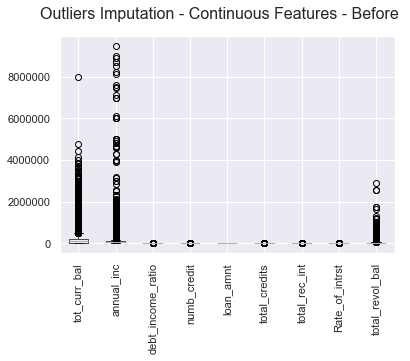

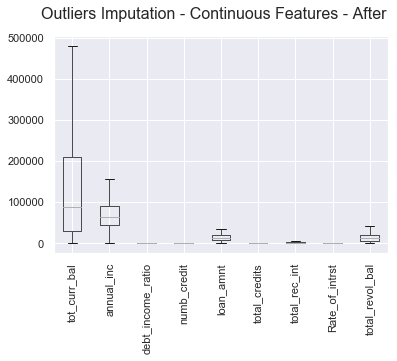

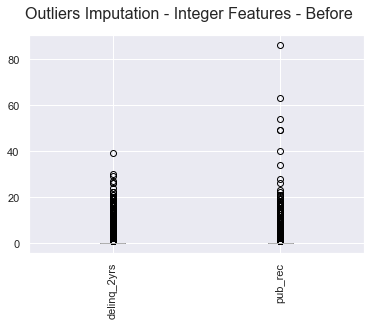

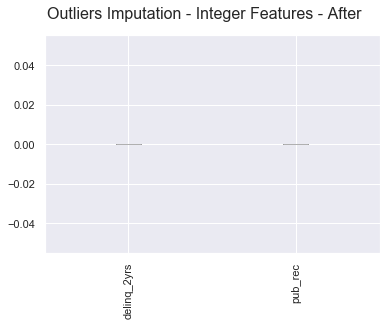

In [236]:
boxplot = df_imputed.boxplot(column=continuous_vars)
plt.xticks(rotation=90)
#plt.ylim(0,500000)
plt.suptitle("Outliers Imputation - Continuous Features - Before ",size=16)
plt.show()

boxplot = df_Out.boxplot(column=continuous_vars)
plt.xticks(rotation=90)
 
plt.suptitle("Outliers Imputation - Continuous Features - After ",size=16)
plt.show()

boxplot = df_imputed.boxplot(column=int_vars)
plt.xticks(rotation=90)
#plt.ylim(0,500000)
plt.suptitle("Outliers Imputation - Integer Features - Before ",size=16)
plt.show()

boxplot = df_Out.boxplot(column=int_vars)
plt.xticks(rotation=90)
#plt.ylim(0,500000)
plt.suptitle("Outliers Imputation - Integer Features - After ",size=16)
plt.show()

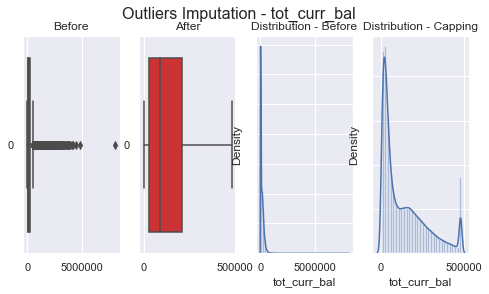

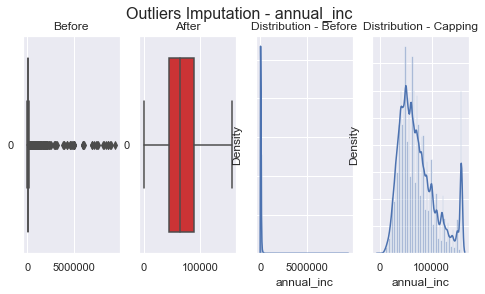

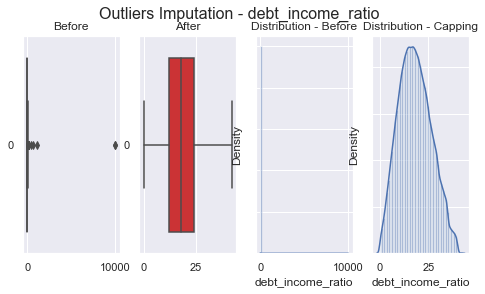

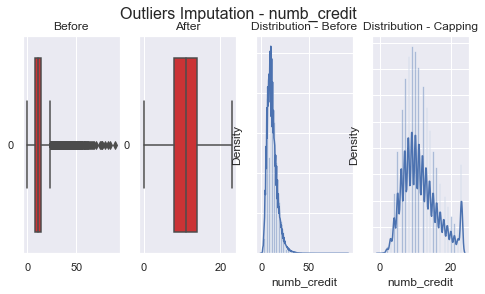

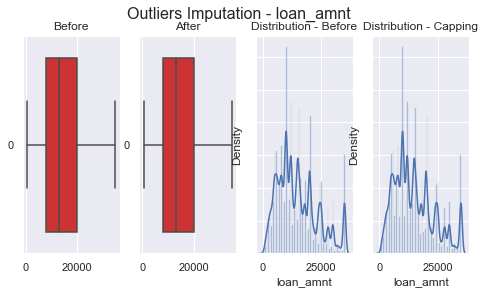

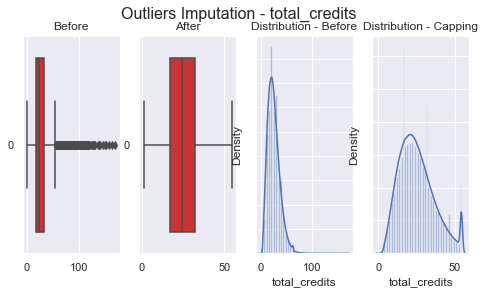

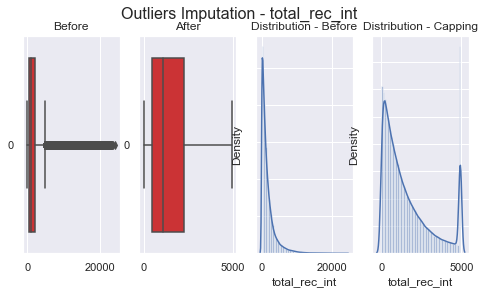

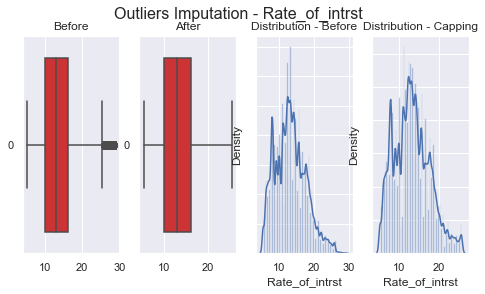

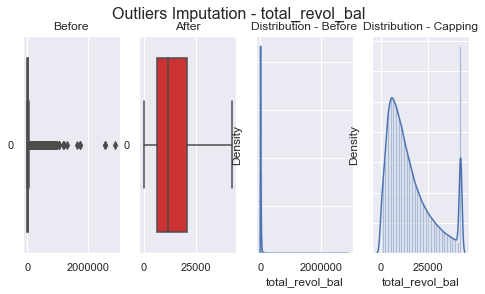

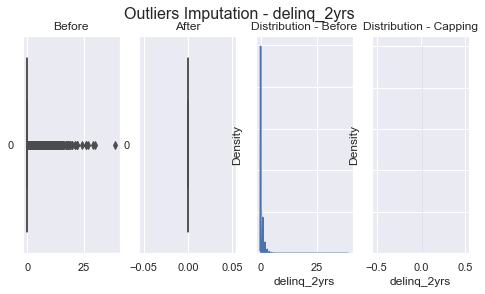

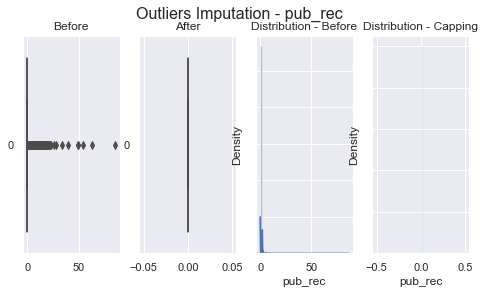

In [239]:
for i in continuous_vars:
   sns.set()
   fig, axes = plt.subplots(nrows = 1, ncols = 4)
   fig.set_size_inches(8, 4)
   ax = sns.boxplot(data=df_imputed[i], orient="h", palette="Set1",ax=axes[0])   
   ax.set_title('Before')
   ax1 = sns.boxplot(data=df_Out[i], orient="h", palette="Set1",ax=axes[1])
   ax1.set_title('After')
   ax2=sns.distplot(df_imputed[i], kde = True, ax = axes[2])
   ax2.set_yticklabels([])
   ax2.set_title('Distribution - Before')
   ax3=sns.distplot(df_Out[i], kde = True, ax = axes[3])
   ax3.set_yticklabels([])
   ax3.set_title('Distribution - Capping')
   plt.suptitle("Outliers Imputation - "+str(i)+"\n\n\n",size=16)
   plt.show()

for i in int_vars:
   sns.set()
   fig, axes = plt.subplots(nrows = 1, ncols = 4)
   fig.set_size_inches(8, 4)
   ax = sns.boxplot(data=df_imputed[i], orient="h", palette="Set1",ax=axes[0])   
   ax.set_title('Before')
   ax1 = sns.boxplot(data=df_Out[i], orient="h", palette="Set1",ax=axes[1])
   ax1.set_title('After')
   ax2=sns.distplot(df_imputed[i], kde = True, ax = axes[2])
   ax2.set_yticklabels([])
   ax2.set_title('Distribution - Before')
   ax3=sns.distplot(df_Out[i], kde = True, ax = axes[3])
   ax3.set_yticklabels([])
   ax3.set_title('Distribution - Capping')
   plt.suptitle("Outliers Imputation - "+str(i)+"\n\n\n",size=16)
   plt.show()

In [240]:
#Normalize Function
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

#Sigmoid Functio
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y



In [241]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

tot_curr_bal


,Feature,Method,P-Value,Result
0,tot_curr_bal,Normalized,0.0,reject H0
1,tot_curr_bal,Sigmoid,0.0,reject H0
2,tot_curr_bal,Log,0.0,reject H0
3,tot_curr_bal,Log+1,0.0,reject H0
4,tot_curr_bal,Log Normalized,NaN,reject H0
5,tot_curr_bal,Cube Root,0.0,reject H0
6,tot_curr_bal,Cube Root Normalized,0.0,reject H0
7,tot_curr_bal,Log Max Root,0.0,reject H0
8,tot_curr_bal,Log Max Root Normalized,0.0,reject H0
9,tot_curr_bal,Hyperbolic Tangent,0.0,reject H0


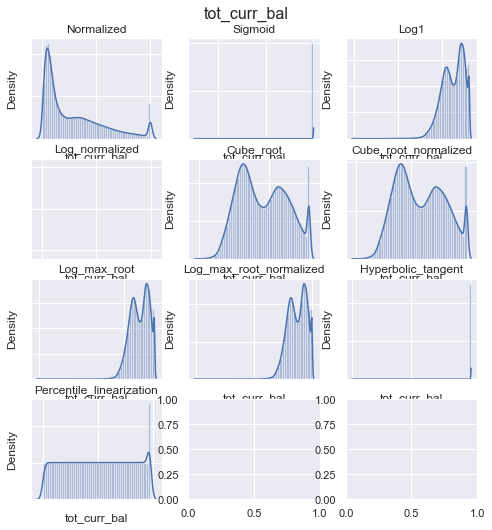

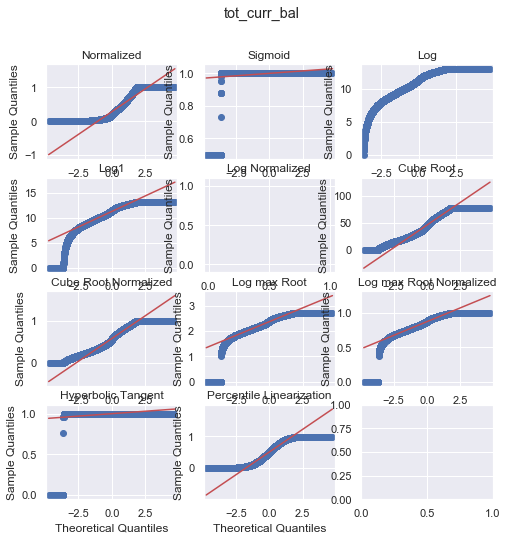

annual_inc


,Feature,Method,P-Value,Result
0,annual_inc,Normalized,0.0,reject H0
1,annual_inc,Sigmoid,0.0,reject H0
2,annual_inc,Log,0.0,reject H0
3,annual_inc,Log+1,0.0,reject H0
4,annual_inc,Log Normalized,NaN,reject H0
5,annual_inc,Cube Root,0.0,reject H0
6,annual_inc,Cube Root Normalized,0.0,reject H0
7,annual_inc,Log Max Root,0.0,reject H0
8,annual_inc,Log Max Root Normalized,0.0,reject H0
9,annual_inc,Hyperbolic Tangent,0.0,reject H0


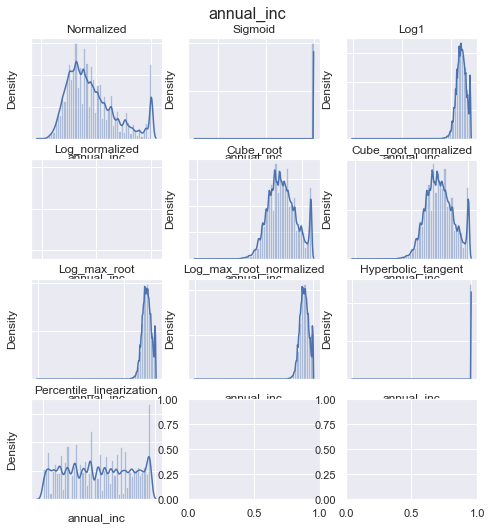

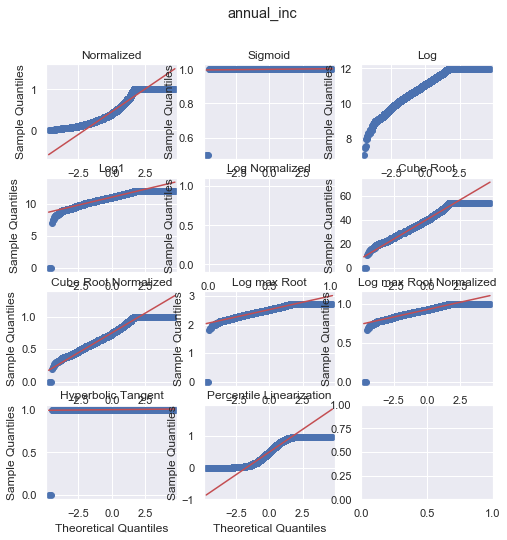

debt_income_ratio


,Feature,Method,P-Value,Result
0,debt_income_ratio,Normalized,0.0,reject H0
1,debt_income_ratio,Sigmoid,0.0,reject H0
2,debt_income_ratio,Log,0.0,reject H0
3,debt_income_ratio,Log+1,0.0,reject H0
4,debt_income_ratio,Log Normalized,NaN,reject H0
5,debt_income_ratio,Cube Root,0.0,reject H0
6,debt_income_ratio,Cube Root Normalized,0.0,reject H0
7,debt_income_ratio,Log Max Root,0.0,reject H0
8,debt_income_ratio,Log Max Root Normalized,0.0,reject H0
9,debt_income_ratio,Hyperbolic Tangent,0.0,reject H0


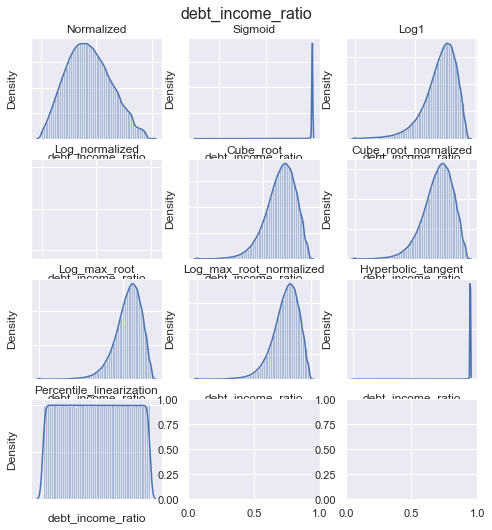

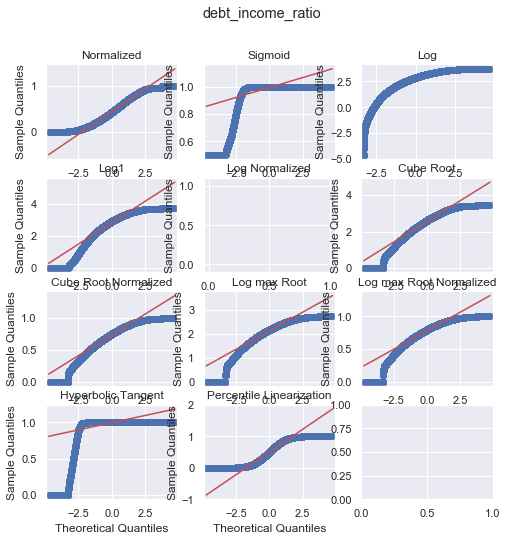

numb_credit


,Feature,Method,P-Value,Result
0,numb_credit,Normalized,0.0,reject H0
1,numb_credit,Sigmoid,0.0,reject H0
2,numb_credit,Log,0.0,reject H0
3,numb_credit,Log+1,0.0,reject H0
4,numb_credit,Log Normalized,NaN,reject H0
5,numb_credit,Cube Root,0.0,reject H0
6,numb_credit,Cube Root Normalized,0.0,reject H0
7,numb_credit,Log Max Root,0.0,reject H0
8,numb_credit,Log Max Root Normalized,0.0,reject H0
9,numb_credit,Hyperbolic Tangent,0.0,reject H0


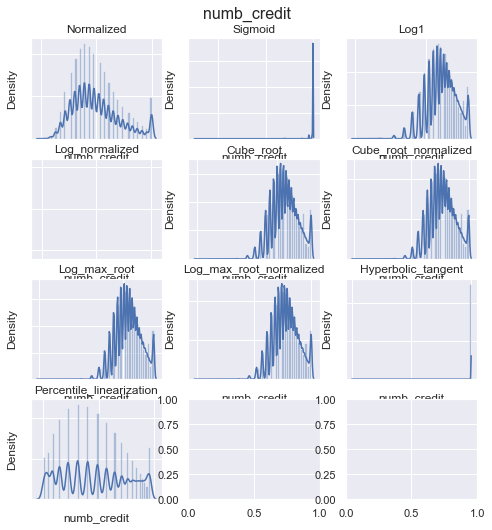

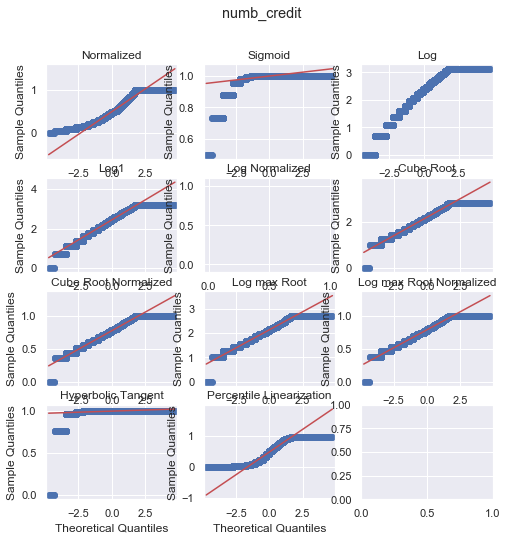

loan_amnt


,Feature,Method,P-Value,Result
0,loan_amnt,Normalized,0.0,reject H0
1,loan_amnt,Sigmoid,0.0,reject H0
2,loan_amnt,Log,0.0,reject H0
3,loan_amnt,Log+1,0.0,reject H0
4,loan_amnt,Log Normalized,0.0,reject H0
5,loan_amnt,Cube Root,0.0,reject H0
6,loan_amnt,Cube Root Normalized,0.0,reject H0
7,loan_amnt,Log Max Root,0.0,reject H0
8,loan_amnt,Log Max Root Normalized,0.0,reject H0
9,loan_amnt,Hyperbolic Tangent,0.0,reject H0


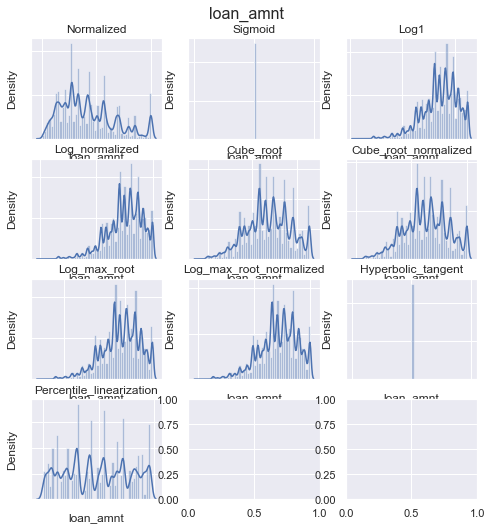

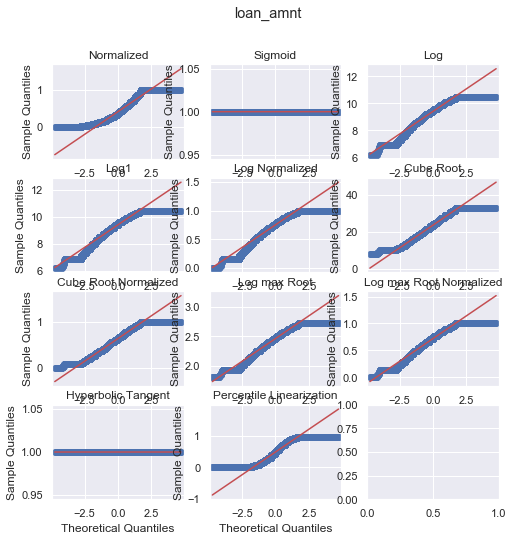

total_credits


,Feature,Method,P-Value,Result
0,total_credits,Normalized,0.0,reject H0
1,total_credits,Sigmoid,0.0,reject H0
2,total_credits,Log,0.0,reject H0
3,total_credits,Log+1,0.0,reject H0
4,total_credits,Log Normalized,0.0,reject H0
5,total_credits,Cube Root,0.0,reject H0
6,total_credits,Cube Root Normalized,0.0,reject H0
7,total_credits,Log Max Root,0.0,reject H0
8,total_credits,Log Max Root Normalized,0.0,reject H0
9,total_credits,Hyperbolic Tangent,0.0,reject H0


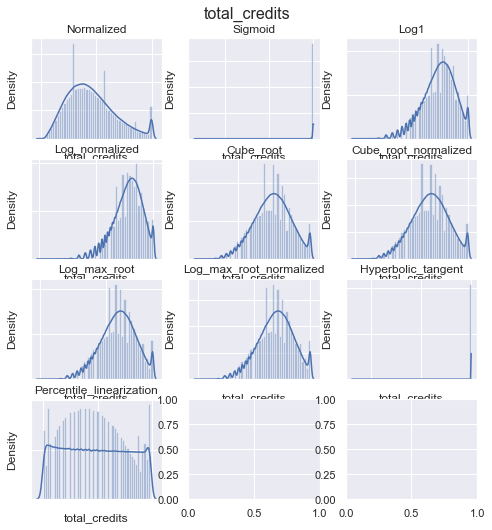

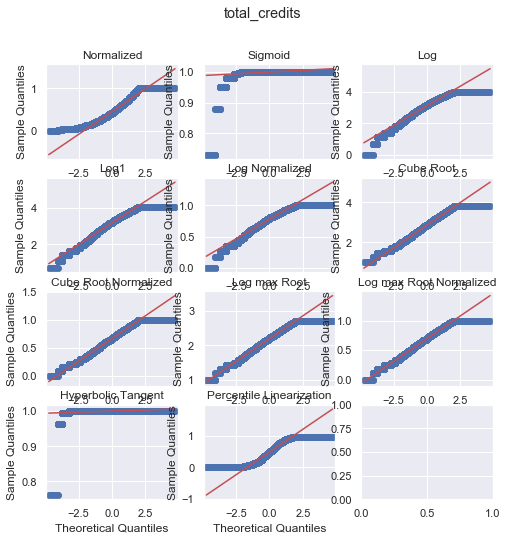

total_rec_int


,Feature,Method,P-Value,Result
0,total_rec_int,Normalized,0.0,reject H0
1,total_rec_int,Sigmoid,0.0,reject H0
2,total_rec_int,Log,0.0,reject H0
3,total_rec_int,Log+1,0.0,reject H0
4,total_rec_int,Log Normalized,NaN,reject H0
5,total_rec_int,Cube Root,0.0,reject H0
6,total_rec_int,Cube Root Normalized,0.0,reject H0
7,total_rec_int,Log Max Root,0.0,reject H0
8,total_rec_int,Log Max Root Normalized,0.0,reject H0
9,total_rec_int,Hyperbolic Tangent,0.0,reject H0


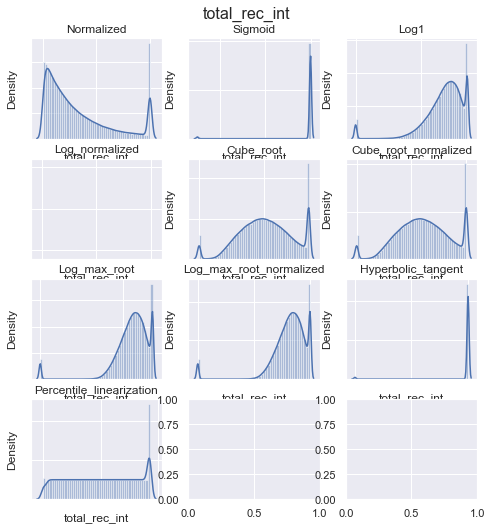

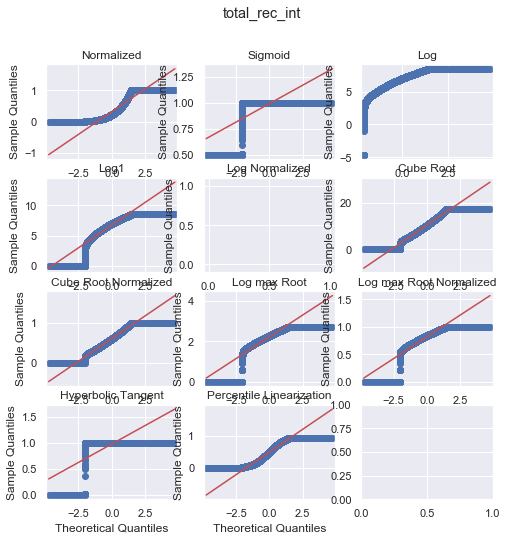

Rate_of_intrst


,Feature,Method,P-Value,Result
0,Rate_of_intrst,Normalized,0.0,reject H0
1,Rate_of_intrst,Sigmoid,0.0,reject H0
2,Rate_of_intrst,Log,0.0,reject H0
3,Rate_of_intrst,Log+1,0.0,reject H0
4,Rate_of_intrst,Log Normalized,0.0,reject H0
5,Rate_of_intrst,Cube Root,0.0,reject H0
6,Rate_of_intrst,Cube Root Normalized,0.0,reject H0
7,Rate_of_intrst,Log Max Root,0.0,reject H0
8,Rate_of_intrst,Log Max Root Normalized,0.0,reject H0
9,Rate_of_intrst,Hyperbolic Tangent,0.0,reject H0


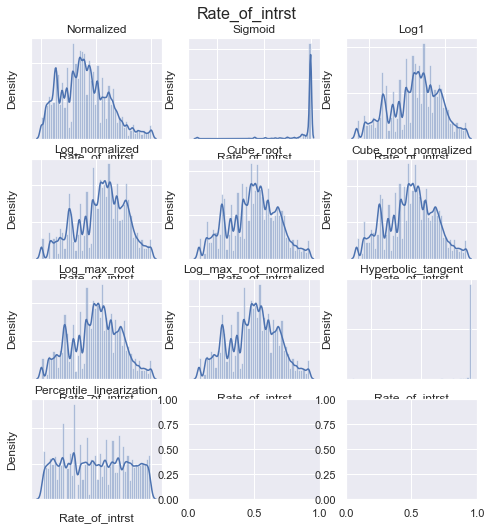

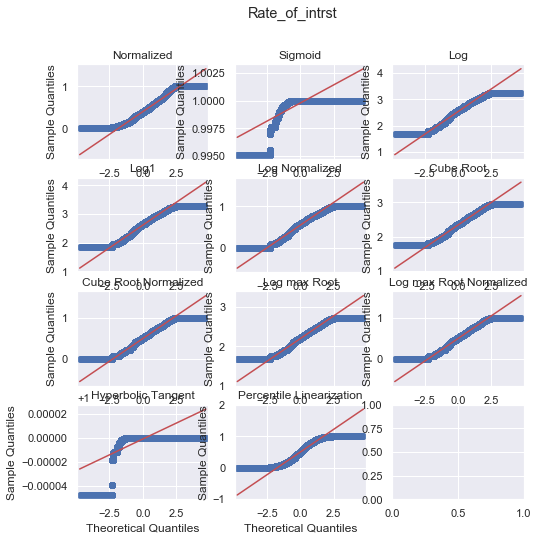

total_revol_bal


,Feature,Method,P-Value,Result
0,total_revol_bal,Normalized,0.0,reject H0
1,total_revol_bal,Sigmoid,0.0,reject H0
2,total_revol_bal,Log,0.0,reject H0
3,total_revol_bal,Log+1,0.0,reject H0
4,total_revol_bal,Log Normalized,NaN,reject H0
5,total_revol_bal,Cube Root,0.0,reject H0
6,total_revol_bal,Cube Root Normalized,0.0,reject H0
7,total_revol_bal,Log Max Root,0.0,reject H0
8,total_revol_bal,Log Max Root Normalized,0.0,reject H0
9,total_revol_bal,Hyperbolic Tangent,0.0,reject H0


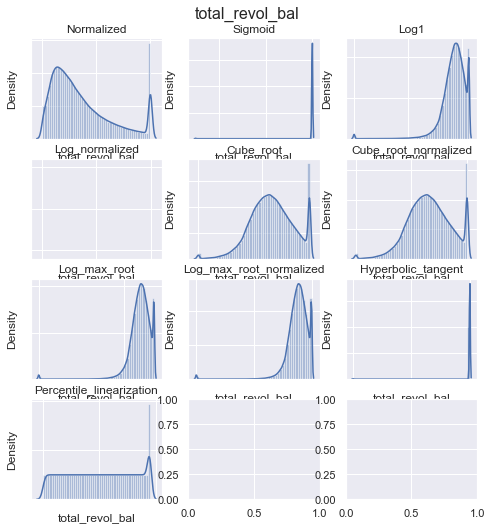

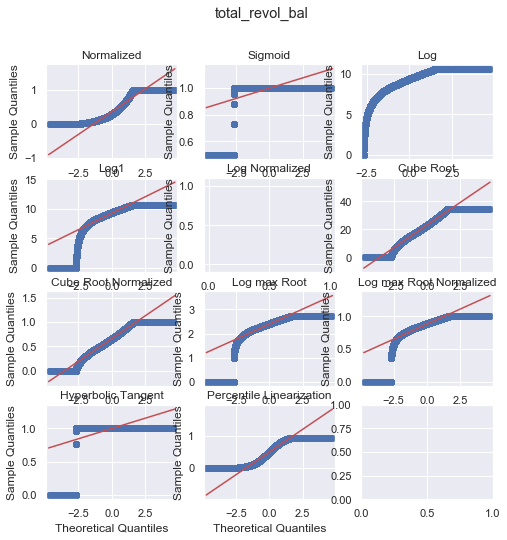

In [242]:
for i in continuous_vars:
    out_temp=pd.DataFrame()
    new_row={}
    helpful_normalized = normalize(df_Out[i])
    helpful_normalized.describe()
        
    print(str(i))
    stat, p = stats.kstest(helpful_normalized, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Normalized','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
    
    helpful_sigmoid = sigmoid(df_Out[i])
    helpful_sigmoid.describe()
    
    stat, p = stats.kstest(helpful_sigmoid, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Sigmoid','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
        
    #Log Function
    helpful_log = np.log(df_Out[i])
    helpful_log.describe()
    
    
    stat, p = stats.kstest(helpful_log, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Log','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
       

    
    #Log + 1 Function
    helpful_log1 = np.log(df_Out[i] + 1)
    helpful_log1.describe()
    
    
    stat, p = stats.kstest(helpful_log1, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Log+1','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
    

    
    #Log + 1 Normalized
    helpful_log_normalized = normalize(helpful_log)
    helpful_log_normalized.describe()
    
    
    stat, p = stats.kstest(helpful_log_normalized, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Log Normalized','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
       
    #Cube Root Function
    helpful_cube_root = df_Out[i]**(1/3)
    helpful_cube_root.describe()
    
    
    stat, p = stats.kstest(helpful_cube_root, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Cube Root','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
    

    #Cube Root Normalized
    helpful_cube_root_normalized = normalize(helpful_cube_root)
    helpful_cube_root_normalized.describe()
    
    
    stat, p = stats.kstest(helpful_cube_root_normalized, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Cube Root Normalized','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
    

    
    
    #Log Max Root
    log_max = np.log(df_Out[i].max())
    helpful_log_max_root = df_Out[i]**(1/log_max)
    helpful_log_max_root.describe()
    
    
    stat, p = stats.kstest(helpful_log_max_root, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Log Max Root','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
    

    
    #Log Max Root Normalized
    helpful_log_max_root_normalized = normalize(helpful_log_max_root)
    helpful_log_max_root_normalized.describe()
    
    
    stat, p = stats.kstest(helpful_log_max_root_normalized, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Log Max Root Normalized','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)

    
    #Hyperbolic Tangent
    helpful_hyperbolic_tangent = np.tanh(df_Out[i])
    helpful_hyperbolic_tangent.describe()
    
    
    stat, p = stats.kstest(helpful_hyperbolic_tangent, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Hyperbolic Tangent','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
    

    #Percentile Linearization
    size = len(df_Out[i])-1
    helpful_percentile_linearization = df_Out[i].rank(method='min').apply(lambda x: (x-1)/size)
    helpful_percentile_linearization.describe()

    # normality test
    
    stat, p = stats.kstest(helpful_percentile_linearization, 'norm', args=(5, 3))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        result="fail to reject H0"        
    else:
        result="reject H0"
    
    new_row={'Feature':str(i),'Method':'Percentile Linearization','P-Value':p,'Result':result}
    out_temp = out_temp.append(new_row, ignore_index=True)
        
        
    out_temp.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])
    
    #Test Results
    display(out_temp)
    
    
    #Distribution Graphs
    sns.set()
    fig, axes = plt.subplots(nrows = 4, ncols = 3)
    fig.set_size_inches(8, 8)

    ax=sns.distplot(helpful_normalized, kde = True, ax = axes[0, 0])
    ax.set_title('Normalized')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax=sns.distplot(helpful_sigmoid, kde = True, ax = axes[0, 1])
    ax.set_title('Sigmoid')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax=sns.distplot(helpful_log1, kde = True, ax = axes[0, 2])
    ax.set_title('Log1')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax=sns.distplot(helpful_log_normalized, kde = True, ax = axes[1, 0])
    ax.set_title('Log_normalized')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax=sns.distplot(helpful_cube_root, kde = True, ax = axes[1, 1])
    ax.set_title('Cube_root')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax=sns.distplot(helpful_cube_root_normalized, kde = True, ax = axes[1, 2])
    ax.set_title('Cube_root_normalized')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax=sns.distplot(helpful_log_max_root, kde = True, ax = axes[2, 0])
    ax.set_title('Log_max_root')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax=sns.distplot(helpful_log_max_root_normalized, kde = True, ax = axes[2, 1])
    ax.set_title('Log_max_root_normalized')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax=sns.distplot(helpful_hyperbolic_tangent, kde = True, ax = axes[2, 2])
    ax.set_title('Hyperbolic_tangent')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax=sns.distplot(helpful_percentile_linearization, kde = True, ax = axes[3, 0])
    ax.set_title('Percentile_linearization')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    #ax1.set_xticklabels([0,50])
    #ax1.set_yticklabels([])

    plt.suptitle(str(i),size=16)
    #plt.legend(loc='best')
    plt.subplots_adjust(top=.925)
    plt.show()
    
    
    #Q-Q -Normality Test Graphs
    fig, axes = plt.subplots(nrows = 4, ncols = 3)
    fig.set_size_inches(8, 8)

    fig.suptitle(str(i))
    qqplot(helpful_normalized, line='s',ax=axes[0,0])
    axes[0, 0].set_title("Normalized")
    qqplot(helpful_sigmoid, line='s',ax=axes[0,1])
    axes[0, 1].set_title("Sigmoid")
    qqplot(helpful_log, line='s',ax=axes[0,2])
    axes[0, 2].set_title("Log")
    qqplot(helpful_log1, line='s',ax=axes[1,0])
    axes[1, 0].set_title("Log1")
    qqplot(helpful_log_normalized, line='s',ax=axes[1,1])
    axes[1, 1].set_title("Log Normalized")
    qqplot(helpful_cube_root, line='s',ax=axes[1,2])
    axes[1, 2].set_title("Cube Root")
    qqplot(helpful_cube_root_normalized, line='s',ax=axes[2,0])
    axes[2, 0].set_title("Cube Root Normalized")
    qqplot(helpful_log_max_root, line='s',ax=axes[2,1])
    axes[2, 1].set_title("Log max Root")
    qqplot(helpful_log_max_root_normalized, line='s',ax=axes[2,2])
    axes[2, 2].set_title("Log max Root Normalized")
    qqplot(helpful_hyperbolic_tangent, line='s',ax=axes[3,0])
    axes[3, 0].set_title("Hyperbolic Tangent")
    qqplot(helpful_percentile_linearization, line='s',ax=axes[3,1])
    axes[3, 1].set_title("Percentile Linearization")
    plt.show()
    

In [245]:
df_Out=df_Out.drop(columns = 'delinq_2yrs')
df_Out=df_Out.drop(columns = 'pub_rec')

In [253]:
#Main Data Split0/20
X = df_Out[df_Out.columns.difference(['total_revol_bal'])]
y = df_Out['total_revol_bal']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(709880, 15)

(177470, 15)

(709880,)

(177470,)

In [258]:
#80% Data Split - train(70%) and Test(30%)
XX_train, XX_test, yy_train, yy_test = train_test_split(X_train,y_train,test_size=0.2,random_state=27)
display(XX_train.shape)
display(XX_test.shape)
display(yy_train.shape)
display(yy_test.shape)

(567904, 15)

(141976, 15)

(567904,)

(141976,)

In [262]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

temp=continuous_vars.copy()
temp.remove('total_revol_bal')

# fit scaler on training data
norm = MinMaxScaler().fit(XX_train[temp])

# transform training data
X_train_norm = norm.transform(XX_train[temp])

# transform testing dataabs
X_test_norm = norm.transform(XX_test[temp])

In [269]:
X_train_norm_df=pd.DataFrame(X_train_norm,columns=temp)
X_test_norm_df=pd.DataFrame(X_test_norm,columns=temp)
display(X_train_norm_df.describe())
display(X_test_norm_df.describe())

XX_train_norm=XX_train.copy()
XX_test_norm=XX_test.copy()

XX_train_norm[temp]=X_train_norm_df.copy()
XX_test_norm[temp]=X_test_norm_df.copy()

display(XX_train_norm.describe())
display(XX_test_norm.describe())

,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst
count,567904.000000,567904.000000,567904.000000,567904.000000,567904.000000,567904.000000,567904.000000,567904.000000
mean,0.283158,0.454232,0.431685,0.495834,0.413296,0.450902,0.316597,0.392303
std,0.268675,0.220184,0.197596,0.210538,0.244501,0.211980,0.292418,0.216646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.064634,0.285714,0.283504,0.347826,0.217391,0.299065,0.089462,0.231245
50%,0.181674,0.412698,0.420376,0.478261,0.362319,0.429907,0.217623,0.379797
75%,0.439669,0.571429,0.570102,0.608696,0.565217,0.579439,0.454297,0.538747
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst
count,141976.000000,141976.000000,141976.000000,141976.000000,141976.000000,141976.000000,141976.000000,141976.000000
mean,0.282468,0.453863,0.431283,0.495475,0.413170,0.450909,0.317080,0.392461
std,0.267951,0.219302,0.197748,0.210081,0.244352,0.212061,0.292175,0.215907
min,0.000000,0.024127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.064479,0.285714,0.283266,0.347826,0.217391,0.299065,0.090147,0.231245
50%,0.182118,0.412251,0.419900,0.478261,0.362319,0.429907,0.218849,0.379797
75%,0.437936,0.571429,0.569626,0.608696,0.565217,0.579439,0.454067,0.538747
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Emp_designation,Experience,Rate_of_intrst,annual_inc,debt_income_ratio,home_ownership,initial_list_status,loan_amnt,numb_credit,purpose,tot_curr_bal,tot_curr_bal_imp,total_credits,total_rec_int,verification_status
count,567904.000000,567904.000000,363640.000000,363640.000000,363640.000000,567904.000000,567904.000000,363640.000000,363640.000000,567904.000000,363640.000000,5.679040e+05,363640.000000,363640.000000,567904.000000
mean,151891.648712,3.529769,0.392288,0.454352,0.431488,2.900061,0.485077,0.413223,0.495504,2.570905,0.283472,1.395312e+05,0.450808,0.316302,1.027204
std,82024.515387,3.161050,0.216783,0.220202,0.197513,1.921630,0.499778,0.244297,0.210339,2.280035,0.268659,1.531550e+05,0.211949,0.292218,0.792500
min,0.000000,0.000000,0.000000,0.012698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,79608.000000,1.000000,0.231245,0.285714,0.283266,1.000000,0.000000,0.217391,0.347826,2.000000,0.064763,2.988600e+04,0.299065,0.089421,0.000000
50%,162556.000000,2.000000,0.379797,0.412698,0.419900,1.000000,0.000000,0.362319,0.478261,2.000000,0.182638,8.058550e+04,0.429907,0.217459,1.000000
75%,220765.000000,6.000000,0.538747,0.571429,0.569626,5.000000,1.000000,0.565217,0.608696,2.000000,0.439842,2.083175e+05,0.579439,0.454329,2.000000
max,289193.000000,10.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,13.000000,1.000000,4.447397e+06,1.000000,1.000000,2.000000


,Emp_designation,Experience,Rate_of_intrst,annual_inc,debt_income_ratio,home_ownership,initial_list_status,loan_amnt,numb_credit,purpose,tot_curr_bal,tot_curr_bal_imp,total_credits,total_rec_int,verification_status
count,141976.000000,141976.000000,22622.000000,22622.000000,22622.000000,141976.000000,141976.000000,22622.000000,22622.000000,141976.000000,22622.000000,1.419760e+05,22622.000000,22622.000000,141976.000000
mean,151962.247260,3.535922,0.392328,0.455611,0.429779,2.897264,0.484800,0.411821,0.495055,2.568948,0.281929,1.395927e+05,0.449878,0.316318,1.029420
std,82029.630057,3.165587,0.214610,0.220217,0.197638,1.922399,0.499771,0.244275,0.209795,2.274163,0.268689,1.563500e+05,0.212411,0.292475,0.792393
min,1.000000,0.000000,0.000000,0.044838,0.000000,1.000000,0.000000,0.014493,0.043478,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,79796.000000,1.000000,0.231245,0.289860,0.282076,1.000000,0.000000,0.217391,0.347826,2.000000,0.064408,2.984100e+04,0.280374,0.089783,0.000000
50%,162518.000000,2.000000,0.379797,0.412698,0.417758,1.000000,0.000000,0.362319,0.478261,2.000000,0.180991,8.086250e+04,0.429907,0.218231,1.000000
75%,220765.000000,6.000000,0.528349,0.571429,0.568198,5.000000,1.000000,0.565217,0.608696,2.000000,0.436105,2.079228e+05,0.579439,0.451254,2.000000
max,289191.000000,10.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,13.000000,1.000000,8.000078e+06,1.000000,1.000000,2.000000


In [294]:
updated_cat_vars=['home_ownership', 'initial_list_status', 'purpose', 'verification_status']

for i in updated_cat_vars:
    cats=X_train[i].unique()
    print(cats)
    data = pd.DataFrame({'color': cats})
    print(pd.get_dummies(data))
    

[5. 4. 1. 3. 2. 0.]
   color
0    5.0
1    4.0
2    1.0
3    3.0
4    2.0
5    0.0
[1. 0.]
   color
0    1.0
1    0.0
[ 2.  1. 12.  7.  6.  4.  9. 11.  0. 10.  8.  5.  3. 13.]
    color
0     2.0
1     1.0
2    12.0
3     7.0
4     6.0
5     4.0
6     9.0
7    11.0
8     0.0
9    10.0
10    8.0
11    5.0
12    3.0
13   13.0
[2. 0. 1.]
   color
0    2.0
1    0.0
2    1.0


In [298]:
XX_train_norm=XX_train.copy()
XX_test_norm=XX_test.copy()

In [300]:
XX_train_norm.drop(columns='tot_curr_bal_imp')

,Emp_designation,Experience,Rate_of_intrst,annual_inc,debt_income_ratio,home_ownership,initial_list_status,loan_amnt,numb_credit,purpose,tot_curr_bal,total_credits,total_rec_int,verification_status
37696,84746.0,1.0,7.690,130000.0,3.66,1.0,0.0,21000,6.0,1.0,15594.0,12.0,756.99000,2.0
658235,138486.0,2.0,14.470,65000.0,15.86,5.0,0.0,27300,5.0,2.0,35210.0,24.0,4933.71375,1.0
383149,160186.0,1.0,25.515,34000.0,25.34,5.0,1.0,10150,19.0,2.0,20461.0,36.0,3197.23000,2.0
869169,177906.0,1.0,17.860,65000.0,18.92,1.0,0.0,10500,10.0,2.0,131908.0,23.0,1475.96000,0.0
653147,159948.0,9.0,19.720,28000.0,30.94,5.0,0.0,9250,5.0,2.0,18873.0,10.0,1581.74000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681643,41040.0,6.0,7.490,157500.0,9.59,5.0,0.0,24000,16.0,2.0,366351.0,23.0,1640.18000,1.0
350808,276181.0,2.0,16.550,80000.0,22.98,4.0,0.0,12275,23.0,2.0,300602.0,54.5,1095.04000,2.0
233163,222013.0,1.0,10.150,87500.0,29.30,1.0,1.0,35000,22.0,2.0,224236.0,50.0,4025.76000,2.0
175003,197763.0,9.0,12.990,38500.0,21.07,1.0,1.0,16000,13.0,2.0,22338.0,29.0,2675.71000,1.0


In [308]:
XX_train_norm_temp=XX_train_norm.copy()
temp

['tot_curr_bal',
 'annual_inc',
 'debt_income_ratio',
 'numb_credit',
 'loan_amnt',
 'total_credits',
 'total_rec_int',
 'Rate_of_intrst']

In [309]:
XX_train_norm_temp[temp]=norm.transform(XX_train_norm_temp[temp])
XX_train_norm_temp

,Emp_designation,Experience,Rate_of_intrst,annual_inc,debt_income_ratio,home_ownership,initial_list_status,loan_amnt,numb_credit,purpose,tot_curr_bal,tot_curr_bal_imp,total_credits,total_rec_int,verification_status
37696,84746.0,1.0,0.117356,0.825397,0.087122,1.0,0.0,0.594203,0.260870,1.0,0.032402,15594.0,0.205607,0.153432,2.0
658235,138486.0,2.0,0.453082,0.412698,0.377529,5.0,0.0,0.776812,0.217391,2.0,0.073162,35210.0,0.429907,1.000000,1.0
383149,160186.0,1.0,1.000000,0.215873,0.603190,5.0,1.0,0.279710,0.826087,2.0,0.042515,20461.0,0.654206,0.648037,2.0
869169,177906.0,1.0,0.620946,0.412698,0.450369,1.0,0.0,0.289855,0.434783,2.0,0.274088,131908.0,0.411215,0.299158,0.0
653147,159948.0,9.0,0.713048,0.177778,0.736491,5.0,0.0,0.253623,0.217391,2.0,0.039216,18873.0,0.168224,0.320598,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681643,41040.0,6.0,0.107452,1.000000,0.228279,5.0,0.0,0.681159,0.695652,2.0,0.761230,366351.0,0.411215,0.332443,1.0
350808,276181.0,2.0,0.556078,0.507937,0.547013,4.0,0.0,0.341304,1.000000,2.0,0.624612,300602.0,1.000000,0.221950,2.0
233163,222013.0,1.0,0.239168,0.555556,0.697453,1.0,1.0,1.000000,0.956522,2.0,0.465933,224236.0,0.915888,0.815970,2.0
175003,197763.0,9.0,0.379797,0.244444,0.501547,1.0,1.0,0.449275,0.565217,2.0,0.046415,22338.0,0.523364,0.542332,1.0


In [310]:
regr = linear_model.LinearRegression()
regr.fit(XX_train_norm_temp, yy_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 -3577.741645406668
Coefficients: 
 [-9.39773027e-04 -1.05011712e+02 -4.63663298e+03  1.24005786e+04
  1.43252321e+04 -1.48110489e+01 -2.92154143e+02  1.28221015e+04
  9.24988706e+03 -2.54145758e+02  5.47356670e+03  1.73173288e-03
 -4.99755026e+03  1.81530785e+03  2.30854009e+01]


In [318]:
pred = regr.predict(XX_test)
test_set_rmse = (np.sqrt(mean_squared_error(yy_test, pred)))
test_set_rmse
#test_set_r2 = r2_score(yy_test, pred)

2104907834.9323537

In [279]:
X_train_norm_df.isnull().sum()
norm

MinMaxScaler(copy=True, feature_range=(0, 1))

In [311]:
import statsmodels.api as sm
# prediction with sklearn
#print ('Predicted Stock Index Price: \n', regr.predict([X_train_norm_df]))

# with statsmodels
X = sm.add_constant(XX_train_norm_temp) # adding a constant
 
model = sm.OLS(list(yy_train), XX_train_norm_temp).fit()


In [321]:
predictions = model.predict(XX_test) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.788
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                          1.408e+05
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                        0.00
Time:                        14:46:30   Log-Likelihood:                     -5.9566e+06
No. Observations:              567904   AIC:                                  1.191e+07
Df Residuals:                  567889   BIC:                                  1.191e+07
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [322]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(list(yy_test), predictions))

In [323]:
rms

1867009027.8559146

In [291]:
X_train_norm_df

,tot_curr_bal,annual_inc,debt_income_ratio,numb_credit,loan_amnt,total_credits,total_rec_int,Rate_of_intrst
0,0.032402,0.825397,0.087122,0.260870,0.594203,0.205607,0.153432,0.117356
1,0.073162,0.412698,0.377529,0.217391,0.776812,0.429907,1.000000,0.453082
2,0.042515,0.215873,0.603190,0.826087,0.279710,0.654206,0.648037,1.000000
3,0.274088,0.412698,0.450369,0.434783,0.289855,0.411215,0.299158,0.620946
4,0.039216,0.177778,0.736491,0.217391,0.253623,0.168224,0.320598,0.713048
...,...,...,...,...,...,...,...,...
567899,0.761230,1.000000,0.228279,0.695652,0.681159,0.411215,0.332443,0.107452
567900,0.624612,0.507937,0.547013,1.000000,0.341304,1.000000,0.221950,0.556078
567901,0.465933,0.555556,0.697453,0.956522,1.000000,0.915888,0.815970,0.239168
567902,0.046415,0.244444,0.501547,0.565217,0.449275,0.523364,0.542332,0.379797
